# **Lecture 4 example: Gradient method for parameter estimation**
>
>- NB: Even though the gradient estimation methods have been implemented in most of machine learning/regression method, it would be nice we know how it has been worked
>- There are two types of gradient methods, determinstic and stochastic
>- Think about their efficiency and accuracy, i.e., pros/cons


****For this implementation, we are going to use the advertising dataset. This is a dataset that gives us the total sales for different products, after marketing them on Television, Radio and Newspaper. Using our algorithm, we can find out which medium performs the best for our sales and assign weights to all the mediums accordingly.****

In [74]:
# load some necessary libraries
import pandas as pd
from numpy.random import randint

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
X=df[['TV','radio','newspaper']]
Y=df['sales']
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

**Once we have a normalised dataset, we can start defining our algorithm. To implement a gradient descent algorithm we need to follow 4 steps:**
>
>- Randomly initialize the bias and the weight theta
>- Calculate predicted value of y that is Y given the bias and the weight
>- Calculate the cost function from predicted and actual values of Y
>- Calculate gradient and the weights
>

In [9]:
import random
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta

b,theta=initialize(3)
print("Bias: ",b, ",   ", "Weights: ",theta)

Bias:  0.9526887046636117 ,    Weights:  [0.01683829 0.6870954  0.50098462]


In [11]:
def predict_Y(b,theta,X):
    return b + np.dot(X,theta)

Y_hat=predict_Y(b,theta,X)
Y_hat[0:10]

array([ 2.53068341,  2.00931635,  2.8660883 ,  2.43110685,  1.02304367,
        3.13437818,  1.21417681,  0.3418495 , -0.73375777, -0.20844808])

In [19]:
import math
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)

Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

1.8254478835326722

**NB: The parameters passed to the function are**
>
>- x,y : the input and output variable
>- y_hat: predicted value with current bias and weights
>- b_0,theta_0: current bias and weights
>- Learning rate: learning rate to adjust the update step
>

In [22]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
get_cost(Y,Y_hat)

After initialization -Bias:  0.9526887046636117 theta:  [0.01683829 0.6870954  0.50098462]
After first update -Bias:  0.9336349305703394 theta:  [0.03075531 0.68134039 0.49069747]


1.8254478835326722

In [44]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    b,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for each_iter in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        if((iter_num%10==0)):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
        result_idx=result_idx+1
        iter_num +=1
    print("Final Estimate of b and theta is: ",b,theta)
    return gd_iterations_df,b,theta

gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)

Final Estimate of b and theta is:  0.3364027827437597 [0.46412853 0.2043997  0.13832669]


In [45]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,0.762186
10,10.0,0.736024
20,20.0,0.710951
30,30.0,0.686920
40,40.0,0.663886
50,50.0,0.641806
60,60.0,0.620638
70,70.0,0.600343
80,80.0,0.580883
90,90.0,0.562223


Text(0, 0.5, 'Cost or MSE')

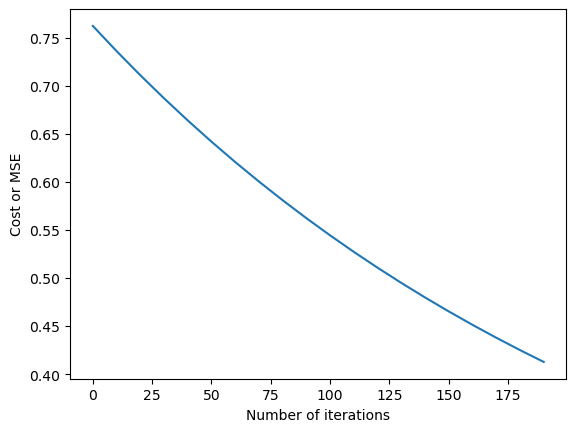

In [46]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

Final Estimate of b and theta is:  2.7774630888127755e-16 [ 0.75306591  0.53648155 -0.00433069]
Final Estimate of b and theta is:  0.015495503503709054 [0.74481196 0.50267295 0.03065355]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

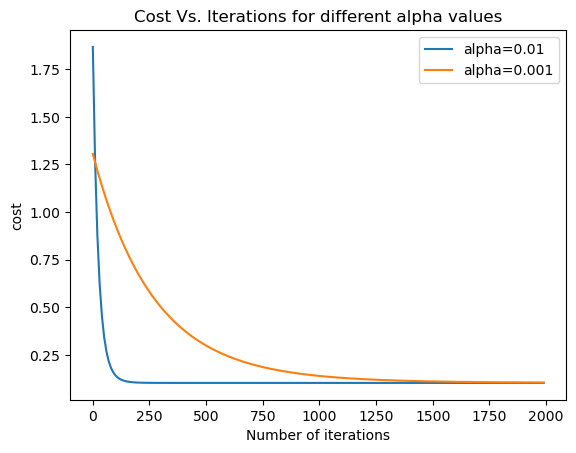

In [47]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

# ***Part II:***: demonstration of stochastic gradient

A good reference to work on: https://jcboyd.github.io/assets/lsml2018/stochastic_gradient_descent.html

In [48]:
from scipy import io
from numpy import log, exp

data = io.loadmat('data_orsay_2017.mat')

X_train, y_train = data['Xtrain'], data['ytrain']
X_test, y_test = data['Xtest'], data['ytest']

print('X_train shape: %s' % str(X_train.shape))
print('y_train shape: %s' % str(y_train.shape))
print('X_test shape: %s' % str(X_test.shape))
print('y_test shape: %s' % str(y_test.shape))

X_train shape: (10000, 100)
y_train shape: (10000, 1)
X_test shape: (100000, 100)
y_test shape: (100000, 1)


In [50]:
# This is to convert the data structure to X= [1, x]
X_train_bt = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
X_test_bt = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
X_train_bt.shape, X_test_bt.shape 

((10000, 101), (100000, 101))

Defind the logical loss function: $Loss = \frac{1}{N}\sum_{i=1}^N\log(1 + \exp(-y_i\mathbf{x}^T\boldsymbol\beta))$


In [61]:
# Defind the logical loss function: $\frac{1}{N}\sum_{i=1}^N\log(1 + \exp(-y_i\mathbf{x}^T\boldsymbol\beta))$

def log_loss(X, y, beta):
    #TODO: implement the logistic loss function
    return np.sum(np.log(1 + np.exp(-y * X.dot(beta)))) / X.shape[0]


# Implement a function to return the logistic loss gradient:
def evaluate_gradient(X, y, beta):
    # TODO: implement the gradient of the logistic loss
    return np.sum(-X * y / (1 + np.exp(y * X.dot(beta))), axis=0) / X.shape[0]

### **NB:** Stochastics gradient descent 

since the Dim(X), number of samples, is 10000, we will have to use the stochastic gradient descent

In [86]:
# Pay attention to the generated radom vector for batch as stochastic gradient
def minibatch_gradient_descent(X, y, batch_size=10, lr=1e-1, max_iters=1000, tol=1e-5):
    # randomly initialise beta
    N, D = X.shape
    beta = np.random.rand(D, 1)
    # initialise history variables
    losses = [log_loss(X, y, beta)]
    betas = [beta]

    for i in range(max_iters):
        # TODO: construct batch
        start = i * batch_size % N
        end = min(start + batch_size, N)
        idx = np.arange(start, end)
        batchX = X[idx]
        batchY = y[idx]
        grad = evaluate_gradient(batchX, batchY, beta)
        grad = grad[:, np.newaxis]
        # TODO: perform gradient descent step (as before)
        beta -= lr * grad
        if i % 10 == 0:
            loss = log_loss(X, y, beta)
            losses.append(loss)
        betas.append(beta.copy())

        if np.sqrt(grad.T.dot(grad)) < tol: break

    return betas, losses


#Another way of random sampling

def minibatch_gradient_descent_sampling(X, y, batch_size=10, lr=1e-1, max_iters=1000, tol=1e-5):
    # randomly initialise beta
    N, D = X.shape
    beta = np.random.rand(D, 1)
    # initialise history variables
    losses = [log_loss(X, y, beta)]
    betas = [beta]

    for i in range(max_iters):
        # TODO: randomly sample batch
        idx = np.random.randint(X.shape[0], size=batch_size)
        batchX = X[idx]
        batchY = y[idx]
        grad = evaluate_gradient(batchX, batchY, beta)
        grad = grad[:, np.newaxis]
        # TODO: perform gradient descent step (as before)
        beta -= lr * grad
        if i % 10 == 0:
            loss = log_loss(X, y, beta)
            losses.append(loss)
        betas.append(beta.copy())

        if np.sqrt(grad.T.dot(grad)) < tol: break

    return betas, losses

# Run batch gradient descent
betas, losses = minibatch_gradient_descent(X_train_bt, y_train, batch_size=10, lr=1e-0)

In [71]:
# Check the accuracy of the predicted model using test data
from scipy.special import expit
beta = betas[-1]
# TODO: calculate output probabilities
probs = expit(X_test_bt.dot(beta))

y_pred = list(map(lambda x : 1 if x >= 0.5 else -1, probs))

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.76615

In [72]:
### Now we start to investigate the impact of batch size to the convergency of results

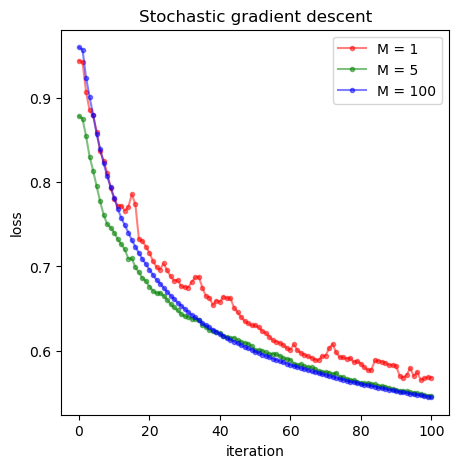

In [73]:
bs = [1, 5, 100]
_, losses1 = minibatch_gradient_descent(X_train, y_train, batch_size=bs[0])
_, losses2 = minibatch_gradient_descent(X_train, y_train, batch_size=bs[1])
_, losses3 = minibatch_gradient_descent(X_train, y_train, batch_size=bs[2])

# create figure
fig = plt.figure(figsize=(5, 5))
# add subplot (rows, cols, number)
ax = fig.add_subplot(1, 1, 1, xlabel='iteration', ylabel='loss')
# plot data on new axis
ax.plot(losses1, color='red', marker='.', alpha=0.5, label='M = %s'%bs[0])
ax.plot(losses2, color='green', marker='.', alpha=0.5, label='M = %s'%bs[1])
ax.plot(losses3, color='blue', marker='.', alpha=0.5, label='M = %s'%bs[2])
ax.set_title('Stochastic gradient descent')
# display lengend
plt.legend()
# display plot
plt.show()

## Two SGD are used based on their sampling methods, i.e., cycling vs random sampling
**Below we will compare them**

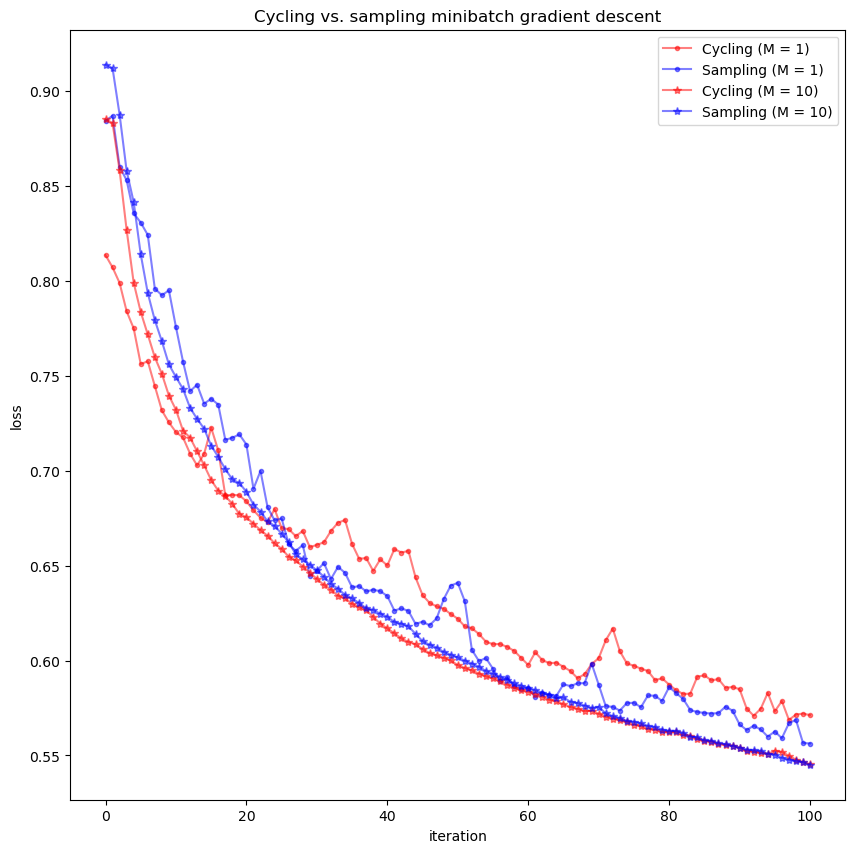

In [105]:
bs = [1, 10]
betas1, losses1 = minibatch_gradient_descent(X_train, y_train, batch_size=bs[0])
betas2, losses2 = minibatch_gradient_descent_sampling(X_train, y_train, batch_size=bs[0])
betas3, losses3 = minibatch_gradient_descent(X_train, y_train, batch_size=bs[1])
betas4, losses4 = minibatch_gradient_descent_sampling(X_train, y_train, batch_size=bs[1])

# create figure
fig = plt.figure(figsize=(10, 10))
# add subplot (rows, cols, number)
ax = fig.add_subplot(1, 1, 1, xlabel='iteration', ylabel='loss')
# plot data on new axis
ax.plot(losses1, color='red', marker='.', alpha=0.5, label='Cycling (M = %d)' % bs[0])
ax.plot(losses2, color='blue', marker='.', alpha=0.5, label='Sampling (M = %d)' % bs[0])
ax.plot(losses3, color='red', marker='*', alpha=0.5, label='Cycling (M = %d)' % bs[1])
ax.plot(losses4, color='blue', marker='*', alpha=0.5, label='Sampling (M = %d)' % bs[1])
# display plot
ax.set_title('Cycling vs. sampling minibatch gradient descent')
plt.legend()
plt.show()

In [106]:
len(betas3),len(betas1)

(1001, 1001)